In [4]:
import pandas as pd
!pip install nbconvert[webpdf]
!playwright install chromium

zsh:1: no matches found: nbconvert[webpdf]
zsh:1: command not found: playwright


In [5]:
bit_df = pd.read_csv("bitcoin.csv")
bit_df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2025-09-21,2025-09-22,115691.0,115816.0,115200.0,115273.0,2.877735e+10,2.302122e+12
1,2025-09-20,2025-09-21,115642.0,116110.0,115409.0,115679.0,4.119797e+10,2.306362e+12
2,2025-09-19,2025-09-20,117111.0,117460.0,115117.0,115606.0,5.308300e+10,2.317462e+12
3,2025-09-18,2025-09-19,116344.0,117879.0,116155.0,117102.0,8.179596e+10,2.336160e+12
4,2025-09-17,2025-09-18,116755.0,117265.0,114892.0,116461.0,6.414947e+10,2.317006e+12


In [7]:
ether_df=pd.read_csv("ethereum.csv")

In [8]:
ether_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,09/22/2025,4194.74,NaN,4305.12,4211.27,4120.28
1,09/21/2025,4303.52,NaN,4478.19,4455.07,4280.81
2,09/20/2025,4477.43,NaN,4465.55,4489.96,4458.28
3,09/19/2025,4466.51,NaN,4549.25,4475.61,4454.92
4,09/18/2025,4551.05,NaN,4615.96,4620.57,4545.30


In [9]:
bit_df['Date'] = pd.to_datetime(bit_df['Start'])

In [10]:
bit_df = bit_df[['Date', 'Close']]

In [11]:
ether_df['Date'] = pd.to_datetime(ether_df['Date'], format="%m/%d/%Y")
ether_df['Date']

0      2025-09-22
1      2025-09-21
2      2025-09-20
3      2025-09-19
4      2025-09-18
          ...    
2103   2019-03-12
2104   2019-03-11
2105   2019-03-10
2106   2019-03-09
2107   2019-03-08
Name: Date, Length: 2108, dtype: datetime64[ns]

In [12]:
ether_df.rename(columns={'Close/Last': 'Close'}, inplace=True)

In [13]:
ether_df = ether_df[['Date', 'Close']]

In [14]:
bit_df['Close'] = pd.to_numeric(bit_df['Close'])
ether_df['Close'] = pd.to_numeric(ether_df['Close'])

In [15]:
print(bit_df.head())
print(ether_df.head())

        Date     Close
0 2025-09-21  115273.0
1 2025-09-20  115679.0
2 2025-09-19  115606.0
3 2025-09-18  117102.0
4 2025-09-17  116461.0
        Date    Close
0 2025-09-22  4194.74
1 2025-09-21  4303.52
2 2025-09-20  4477.43
3 2025-09-19  4466.51
4 2025-09-18  4551.05


__Summary statistics__

In [16]:
bit_df['Close'].describe(include='all')

count      5479.000000
mean      18385.488019
std       27711.878887
min           0.061100
25%         266.682500
50%        5362.320407
75%       27174.870050
max      123374.000000
Name: Close, dtype: float64

In [17]:
ether_df['Close'].describe(include='all')

count    2108.000000
mean     1885.444345
std      1289.147732
min       116.180000
25%       411.257500
50%      1836.160000
75%      2935.195000
max      4796.780000
Name: Close, dtype: float64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

__Histograms__

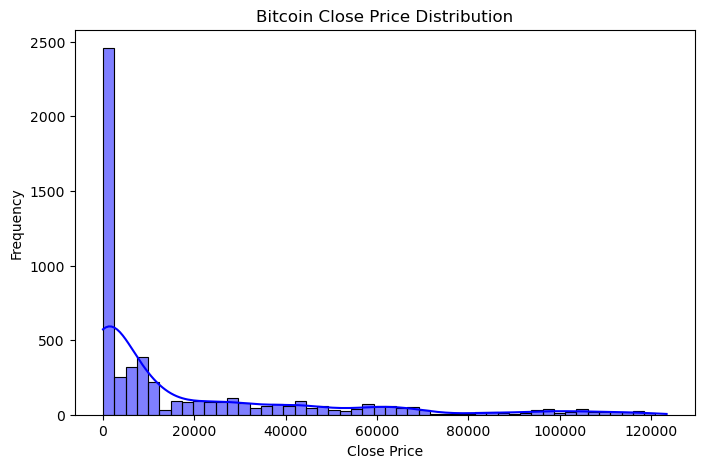

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(bit_df['Close'], bins=50, kde=True, color="blue")
plt.title("Bitcoin Close Price Distribution")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

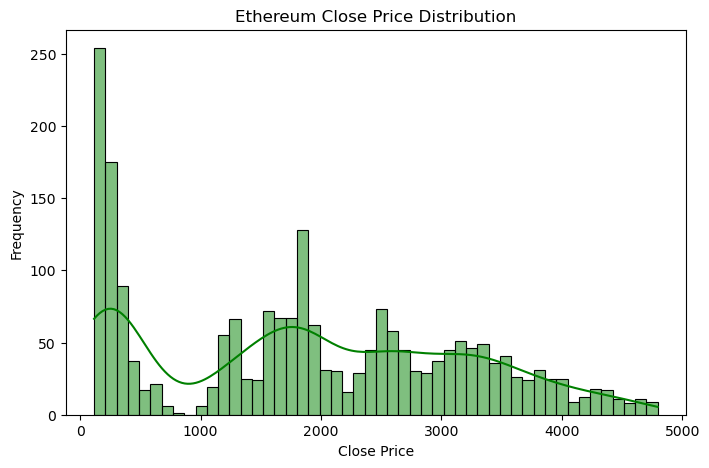

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(ether_df['Close'], bins=50, kde=True, color="green")
plt.title("Ethereum Close Price Distribution")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

__Time series__

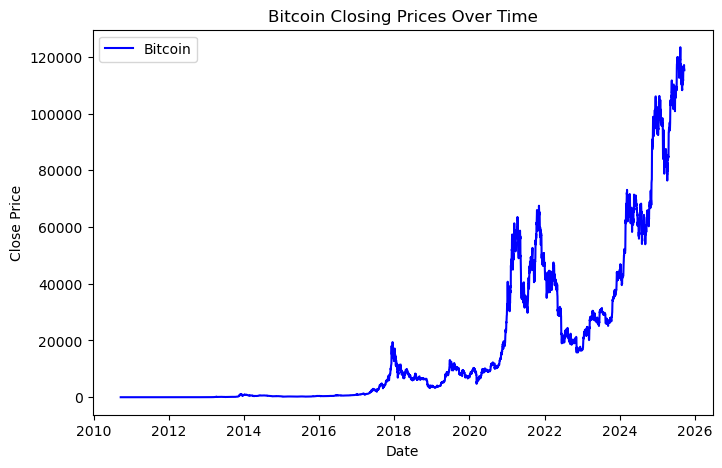

In [21]:
plt.figure(figsize=(8,5))
plt.plot(bit_df['Date'], bit_df['Close'], color="Blue", label="Bitcoin")
plt.title("Bitcoin Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

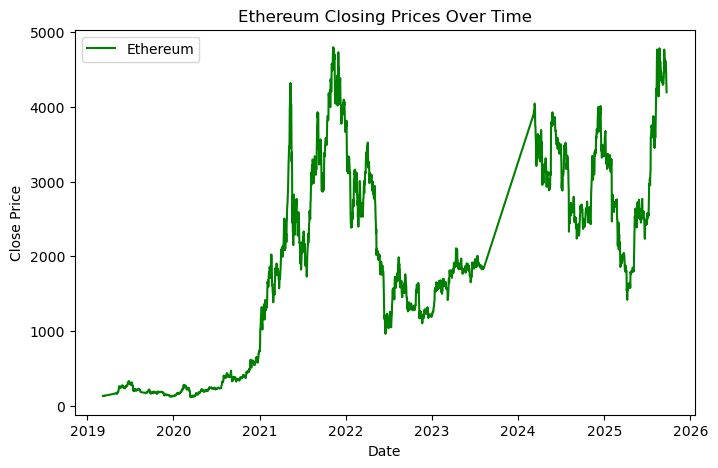

In [22]:
plt.figure(figsize=(8,5))
plt.plot(ether_df['Date'], ether_df['Close'], color="Green", label="Ethereum")
plt.title("Ethereum Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

__Combining all together since the year 2019__

In [23]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

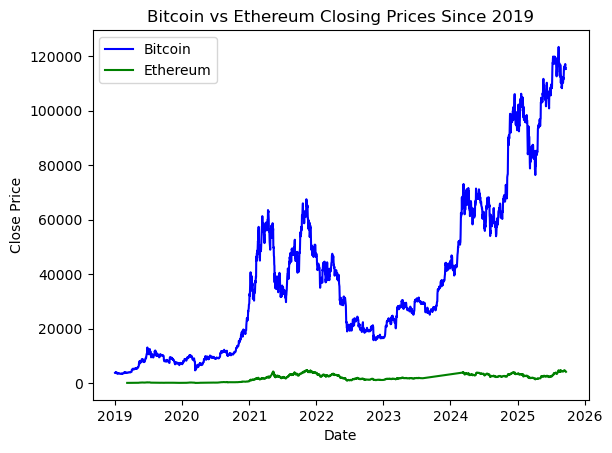

In [24]:
plt.plot(bit_df.loc[bit_df['Date'] >= "2019-01-01", 'Date'],
    bit_df.loc[bit_df['Date'] >= "2019-01-01", 'Close'],
    color="Blue", label="Bitcoin")
plt.plot(ether_df.loc[ether_df['Date'] >= "2019-01-01", 'Date'],
    ether_df.loc[ether_df['Date'] >= "2019-01-01", 'Close'],
    color="Green", label="Ethereum")
plt.title("Bitcoin vs Ethereum Closing Prices Since 2019")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

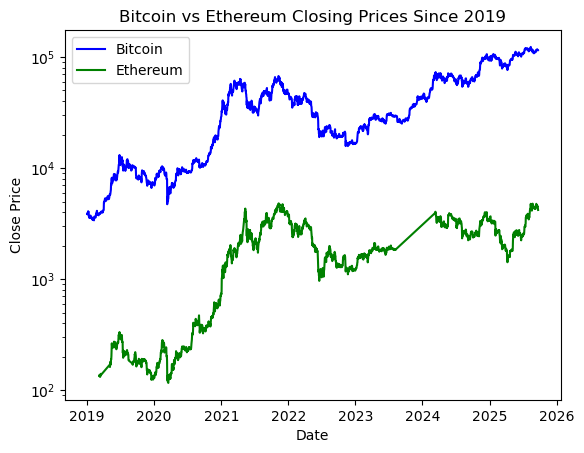

In [25]:
plt.plot(bit_df.loc[bit_df['Date'] >= "2019-01-01", 'Date'],
    bit_df.loc[bit_df['Date'] >= "2019-01-01", 'Close'],
    color="Blue", label="Bitcoin")
plt.plot(ether_df.loc[ether_df['Date'] >= "2019-01-01", 'Date'],
    ether_df.loc[ether_df['Date'] >= "2019-01-01", 'Close'],
    color="Green", label="Ethereum")
plt.yscale("log") #to check the grows patterns
plt.title("Bitcoin vs Ethereum Closing Prices Since 2019")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [26]:
import numpy as np

In [27]:
bit_df.sort_values('Date', inplace=True)
ether_df.sort_values('Date', inplace=True)

__Log-return__

In [28]:
bit_df.loc[:, 'log_return'] = np.log(bit_df['Close']).diff() 
ether_df.loc[:, 'log_return'] = np.log(ether_df['Close']).diff()

In [29]:
bit_df.head()

,Date,Close,log_return
5478,2010-09-22,0.0622,NaN
5477,2010-09-23,0.0623,0.001606
5476,2010-09-24,0.0622,-0.001606
5475,2010-09-25,0.0620,-0.003221
5474,2010-09-26,0.0620,0.000000


In [30]:
ether_df.head()

,Date,Close,log_return
2107,2019-03-08,133.85,NaN
2106,2019-03-09,137.52,0.027050
2105,2019-03-10,135.72,-0.013175
2104,2019-03-11,133.42,-0.017092
2103,2019-03-12,133.80,0.002844


In [31]:
btc = bit_df[['Date','log_return']].copy()
btc.columns = ['Date','BTC_log_return']
eth = ether_df[['Date','log_return']].copy()
eth.columns = ['Date','ETH_log_return']
returns = pd.merge(btc, eth, on='Date', how='inner')
returns = returns[returns['Date'] >= "2019-01-01"].dropna()

In [32]:
returns.head(10)

,Date,BTC_log_return,ETH_log_return
1,2019-03-09,0.015314,0.027050
2,2019-03-10,-0.007426,-0.013175
3,2019-03-11,-0.006092,-0.017092
4,2019-03-12,0.005658,0.002844
5,2019-03-13,-0.001409,-0.013090
6,2019-03-14,0.001220,0.004156
7,2019-03-15,0.007068,0.032641
8,2019-03-16,0.024192,0.023943
9,2019-03-17,-0.004249,-0.007654
10,2019-03-18,0.003315,-0.011774


In [33]:
from scipy.stats import norm

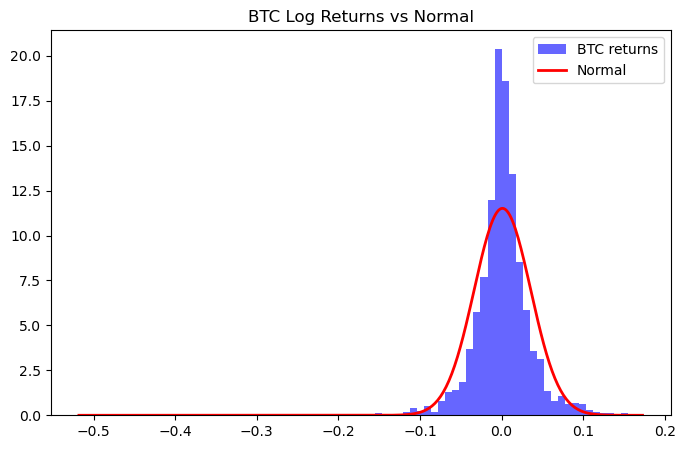

In [34]:
x = returns['BTC_log_return'].dropna()
plt.figure(figsize=(8,5))
plt.hist(x, bins=80, density=True, alpha=0.6, color="Blue", label="BTC returns")
mu, sigma = np.mean(x), np.std(x, ddof=1)
grid = np.linspace(x.min(), x.max(), 400)
plt.plot(grid, norm.pdf(grid, mu, sigma), 'r-', lw=2, label="Normal")
plt.title("BTC Log Returns vs Normal")
plt.legend()
plt.show()

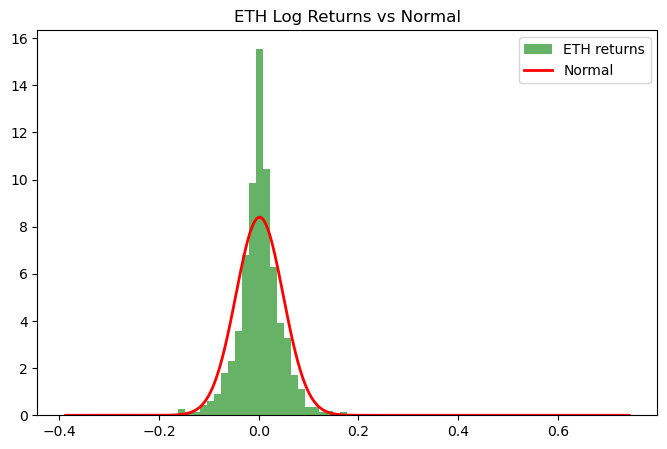

In [35]:
x = returns['ETH_log_return'].dropna()
plt.figure(figsize=(8,5))
plt.hist(x, bins=80, density=True, alpha=0.6, color="Green",label="ETH returns")
mu, sigma = np.mean(x), np.std(x, ddof=1)
grid = np.linspace(x.min(), x.max(), 400)
plt.plot(grid, norm.pdf(grid, mu, sigma), 'r-', lw=2, label="Normal")
plt.title("ETH Log Returns vs Normal")
plt.legend()
plt.show()

__Descriptive statistics__

In [40]:
import numpy as np
from scipy import stats
import scipy.stats as stats

In [39]:
def stat_returns(series, name):
    x = series.dropna().values
    stats_dict = {
        "Mean": np.mean(x),
        "Std Dev": np.std(x, ddof=1),
        "Skewness": stats.skew(x, bias=False),
        "Kurtosis)": stats.kurtosis(x, fisher=True, bias=False),
        "Min": np.min(x),
        "1%": np.percentile(x, 1),
        "5%": np.percentile(x, 5),
        "95%": np.percentile(x, 95),
        "99%": np.percentile(x, 99),
        "Max": np.max(x)}
    return pd.Series(np.round(list(stats_dict.values()), 4), index=stats_dict.keys(), name=name)

btc_desc = stat_returns(returns['BTC_log_return'], "BTC")
eth_desc = stat_returns(returns['ETH_log_return'], "ETH")

desc_table = pd.concat([btc_desc, eth_desc], axis=1)
print(desc_table)

               BTC      ETH
Mean        0.0011   0.0016
Std Dev     0.0347   0.0475
Skewness   -1.5581   1.3678
Kurtosis)  26.3440  32.5315
Min        -0.5181  -0.3872
1%         -0.0982  -0.1294
5%         -0.0493  -0.0695
95%         0.0533   0.0699
99%         0.0973   0.1174
Max         0.1728   0.7432


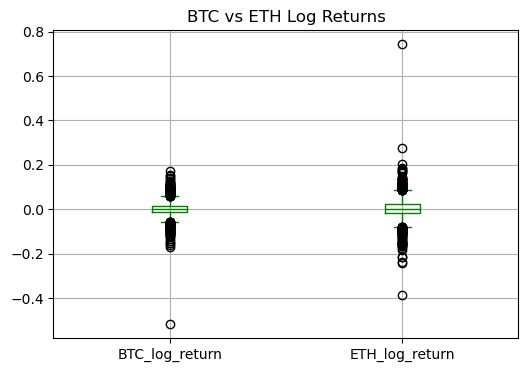

In [42]:
returns[['BTC_log_return','ETH_log_return']].plot(kind='box', figsize=(6,4), grid=True, color="Green")
plt.title("BTC vs ETH Log Returns"); plt.show()

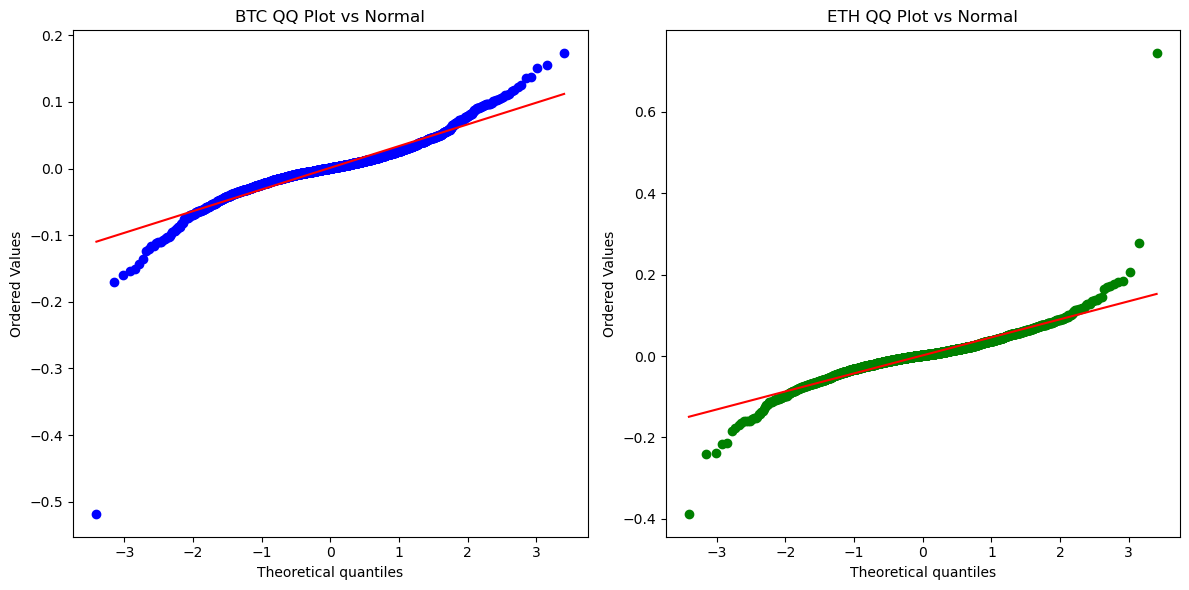

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
x_btc = returns['BTC_log_return'].dropna()
stats.probplot(x_btc, dist="norm", plot=axes[0])
axes[0].get_lines()[0].set_markerfacecolor('blue')
axes[0].get_lines()[0].set_markeredgecolor('blue')
axes[0].set_title("BTC QQ Plot vs Normal")
x_eth = returns['ETH_log_return'].dropna()
stats.probplot(x_eth, dist="norm", plot=axes[1])
axes[1].get_lines()[0].set_markerfacecolor('green') 
axes[1].get_lines()[0].set_markeredgecolor('green')
axes[1].set_title("ETH QQ Plot vs Normal")

plt.tight_layout()
plt.show()

In [48]:
def norm_tests(x, label="series"):
    x = np.asarray(x.dropna())
    mu, sigma = x.mean(), x.std(ddof=1)
    ks = stats.kstest(x, 'norm', args=(mu, sigma))
    jb = stats.jarque_bera(x)
    dag = stats.normaltest(x)
    ad = stats.anderson(x, dist='norm')
    results = pd.DataFrame({
        "Test": ["Kolmogorov–Smirnov", "Jarque–Bera", "D’Agostino", "Anderson–Darling"],
        "Statistic": [
            round(ks.statistic, 3), # measures the maximum gap between the cumulative distribution of our data vs. a normal distribution
            round(jb.statistic, 3), # very strong deviation from normality
            round(dag.statistic, 3), # uses skewness and kurtosis separately to test normality
            round(ad.statistic, 3)], # focuses on the tails (extreme values)
        "p-value": [
            round(ks.pvalue, 3),
            round(jb.pvalue, 3),
            round(dag.pvalue, 3),
            None]
    })
    print(f"\nResults for {label}")
    return results

btc_results = norm_tests(returns['BTC_log_return'], "BTC")
eth_results = norm_tests(returns['ETH_log_return'], "ETH")

display(btc_results)
display(eth_results)


Results for BTC

Results for ETH


,Test,Statistic,p-value
0,Kolmogorov–Smirnov,0.091,0.0
1,Jarque–Bera,61448.320,0.0
2,D’Agostino,1052.630,0.0
3,Anderson–Darling,41.712,NaN


,Test,Statistic,p-value
0,Kolmogorov–Smirnov,0.086,0.0
1,Jarque–Bera,93064.898,0.0
2,D’Agostino,1024.931,0.0
3,Anderson–Darling,37.456,NaN


All four normality tests (K-S, Jarque–Bera, D’Agostino, and Anderson–Darling) strongly reject the null hypothesis of normality (p-values ≈ 0). This indicates that both BTC and ETH returns are not normally distributed, primarily due to fat tails and volatility.